<a href="https://colab.research.google.com/github/ChamodhPiyaratne/Database-And-Analytics/blob/main/Database_and_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
install.packages("RCurl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In order to upload the '.csv' file energy_dataset we can use the RCurl package which can be used to transfer data using urls, for this purpose we will be taking in file energy_dataset from our github repository.

In [11]:
# Call in the RCurl library to import the dataset
library(RCurl)

# import the csv file from the github repository to the variable 'energy_dataset'
dataset <- "https://raw.githubusercontent.com/ChamodhPiyaratne/Database-And-Analytics/main/Energy_dataset.csv"

# Read the CSV content directly from the retrieved text
energy_dataset <- read.csv(text = getURL(dataset))

# Display the first 10 rows of the dataset
print(head(energy_dataset, 10))



Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete




   Relative.Compactness Surface.Area Wall.Area Roof.Area Overall.Height
1                  0.98        514.5     294.0    110.25              7
2                  0.98        514.5     294.0    110.25              7
3                  0.98        514.5     294.0    110.25              7
4                  0.98        514.5     294.0    110.25              7
5                  0.90        563.5     318.5    122.50              7
6                  0.90        563.5     318.5    122.50              7
7                  0.90        563.5     318.5    122.50              7
8                  0.90        563.5     318.5    122.50              7
9                  0.86        588.0     294.0    147.00              7
10                 0.86        588.0     294.0    147.00              7
   Orientation Glazing.Area Glazing.Area.Distribution Heating.Load Cooling.Load
1            2            0                         0        15.55        21.33
2            3            0                     

The above code shows the process of using RCurl to import the dataset and will be processed as a '.csv' file, the first 10 rows of the dataset are shown below

In [15]:
install.packages('sqldf')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’




The above installs the 'sqldf' package which will be used to run the SQL **queries**


In [16]:
library(sqldf)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



Calling in the sqldf library to run the SQL queries

In [36]:
Result <- sqldf("
  SELECT
    `Surface.Area`,
    `Wall.Area`
  FROM
    energy_dataset
  WHERE
    `Relative.Compactness` > 0.97 and Orientation = 3")
print(Result)

   Surface.Area Wall.Area
1         514.5       294
2         514.5       294
3         514.5       294
4         514.5       294
5         514.5       294
6         514.5       294
7         514.5       294
8         514.5       294
9         514.5       294
10        514.5       294
11        514.5       294
12        514.5       294
13        514.5       294
14        514.5       294
15        514.5       294
16        514.5       294


The above code is used to call in certain rows and colums that meet the criteria given by the 'where' argument and should meet both criterias due to 'and' argument

In [33]:
Result <- sqldf("
  SELECT
    AVG(`Relative.Compactness`) AS Avg_Relative_Compactness,
    SUM(`Heating.Load`) AS Total_Heating_Load,
    Max(`Cooling.Load`) AS Maximum_Cooling_Load
  FROM
    energy_dataset GROUP BY Orientation")
print(Result)

  Avg_Relative_Compactness Total_Heating_Load Maximum_Cooling_Load
1                0.7641667            4284.07                46.44
2                0.7641667            4297.09                47.59
3                0.7641667            4273.90                47.01
4                0.7641667            4276.87                48.03


The above code shows aggregate functions being done and the results are grouped by the **orientation** values

In [41]:
Result <- sqldf("
  SELECT
    COUNT(*) AS total_rows,
    CEIL(SUM(`surface.area`)) AS total_surface_area,
    ABS(AVG(`heating.load`)) AS average_heating_load
  FROM
    energy_dataset")
print(Result)

  total_rows total_surface_area average_heating_load
1        768             515872              22.3072


The above code shows arithmetic functions being done on the values produced by the aggregate functions.

In [43]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(dplyr)

Above 2 code snippets show the installation of Dplyr and calling it. Dplyr provides a set of functions for manipulating data frames

In [46]:
filtered_data <- energy_dataset %>%
  filter(Orientation > 4)


print(filtered_data)

    Relative.Compactness Surface.Area Wall.Area Roof.Area Overall.Height
1                   0.98        514.5     294.0    110.25            7.0
2                   0.90        563.5     318.5    122.50            7.0
3                   0.86        588.0     294.0    147.00            7.0
4                   0.82        612.5     318.5    147.00            7.0
5                   0.79        637.0     343.0    147.00            7.0
6                   0.76        661.5     416.5    122.50            7.0
7                   0.74        686.0     245.0    220.50            3.5
8                   0.71        710.5     269.5    220.50            3.5
9                   0.69        735.0     294.0    220.50            3.5
10                  0.66        759.5     318.5    220.50            3.5
11                  0.64        784.0     343.0    220.50            3.5
12                  0.62        808.5     367.5    220.50            3.5
13                  0.98        514.5     294.0    

Using the 'Filter' function to call rows that meet certain arguments

In [49]:
summary_data <- energy_dataset %>%
  group_by(`Heating.Load`) %>%
  summarise(mean_relative_compactness = mean(`Relative.Compactness`))

print(summary_data)


# A tibble: 586 × 2
   Heating.Load mean_relative_compactness
          <dbl>                     <dbl>
 1         6.01                      0.74
 2         6.04                      0.74
 3         6.05                      0.74
 4         6.07                      0.74
 5         6.37                      0.71
 6         6.4                       0.71
 7         6.77                      0.69
 8         6.79                      0.69
 9         6.81                      0.69
10         6.85                      0.69
# ℹ 576 more rows


Using the summarise function to to produce a row for each of the grouped data

In [5]:
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tidyr)

In [ ]:
Using the tidyr package to create tidy data. Tidy data is data where: Each variable is a column; each column is a variable.

In [18]:
clean_data <- energy_dataset %>%
  mutate(House_ID = 1:nrow(energy_dataset)) %>%
  pivot_longer(cols = c(Surface.Area, Wall.Area, Roof.Area), names_to = "Area_Type", values_to = "Area") %>%
  filter (Area > 500)

In [19]:
result <- sqldf("Select * From clean_data  limit 10")
print(result)

   Relative.Compactness Overall.Height Orientation Glazing.Area
1                  0.98              7           2            0
2                  0.98              7           3            0
3                  0.98              7           4            0
4                  0.98              7           5            0
5                  0.90              7           2            0
6                  0.90              7           3            0
7                  0.90              7           4            0
8                  0.90              7           5            0
9                  0.86              7           2            0
10                 0.86              7           3            0
   Glazing.Area.Distribution Heating.Load Cooling.Load House_ID    Area_Type
1                          0        15.55        21.33        1 Surface.Area
2                          0        15.55        21.33        2 Surface.Area
3                          0        15.55        21.33        3 S

The above data is a result of using mutate function to create a new column with the 'House_Id' and using the 'pivot_longer' function to reduce the table width by showing data availble in columns, in rows

In [20]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
library(ggplot2)

Importing ggplot2 to visualize data

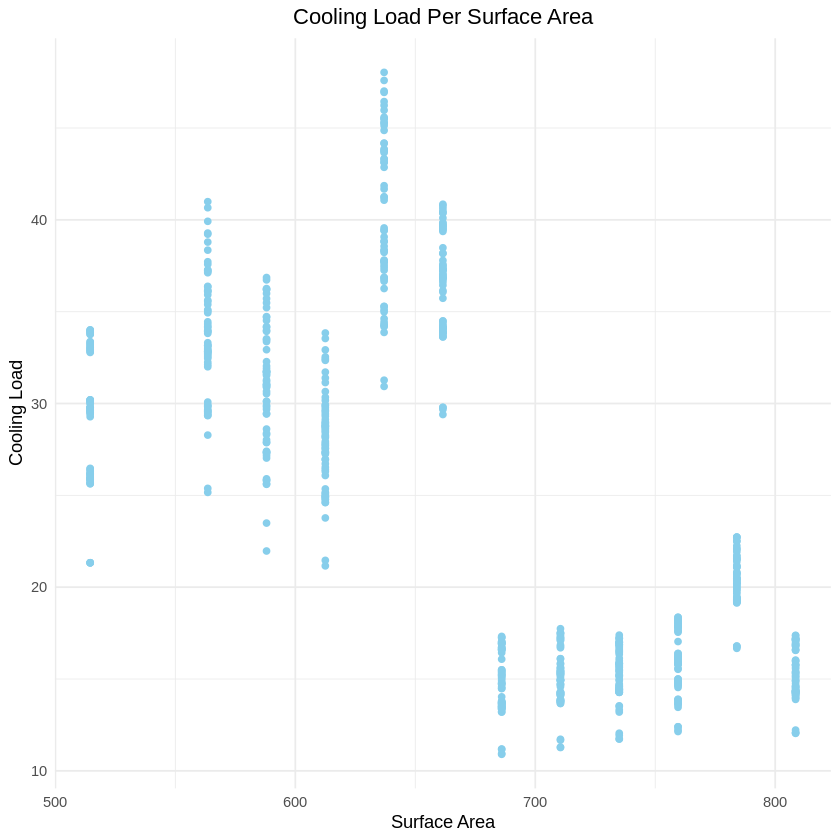

In [22]:
ggplot(energy_dataset, aes(x = `Surface.Area`, y = `Cooling.Load`)) +
  geom_point(color = "skyblue") +  # Using geom_point for scatter plot
  labs(title = "Cooling Load Per Surface Area", x = "Surface Area", y = "Cooling Load") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  # Centering the title

Using the geom_point function to create a scatter plot with the given arguments


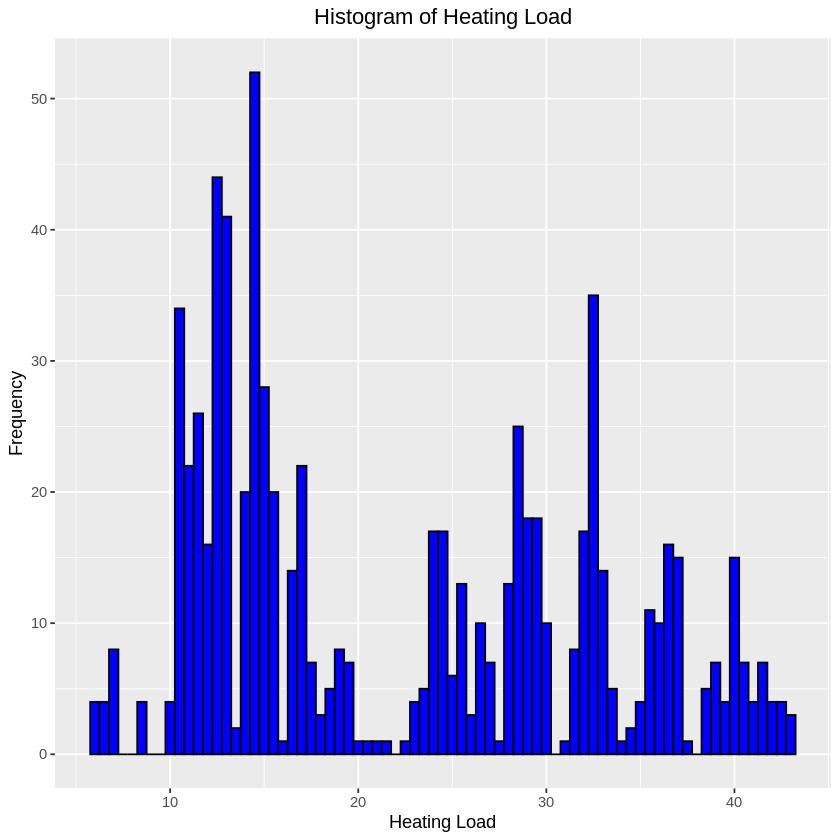

In [24]:
ggplot(energy_dataset, aes(x = `Heating.Load`)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
  labs(
    title = "Histogram of Heating Load",
    x = "Heating Load",
    y = "Frequency"
  )+
  theme(plot.title = element_text(hjust = 0.5))  # Centering the title

Above code is to create a histogram of the frequency of heating load avaialble in the given dataset

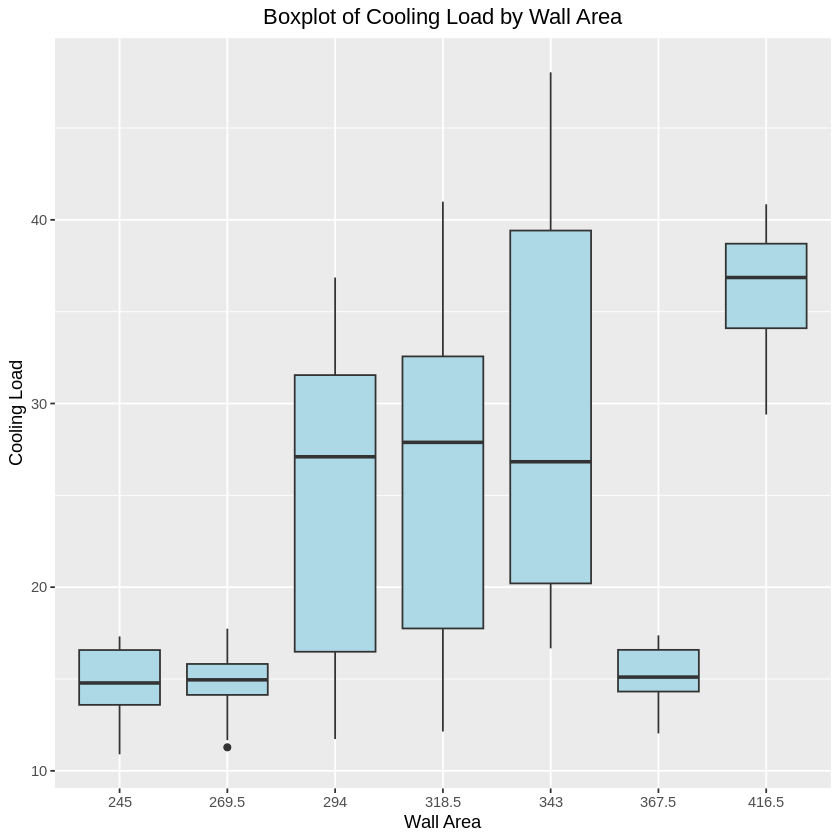

In [25]:
ggplot(energy_dataset, aes(x = factor(Wall.Area), y = Cooling.Load)) +
  geom_boxplot(fill="lightblue") +
  labs(title="Boxplot of Cooling Load by Wall Area", x="Wall Area", y="Cooling Load")+
  theme(plot.title = element_text(hjust = 0.5))  # Centering the title

Using geom_boxplot function to create a boxplot graph showing the summary of distribution

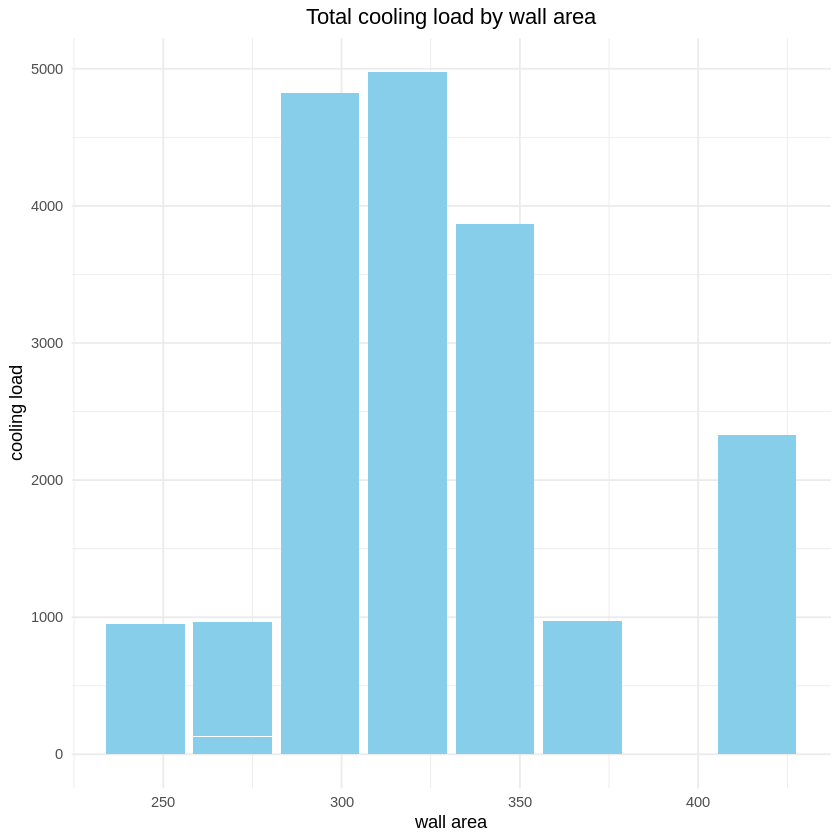

In [28]:
platform_bar <- ggplot(energy_dataset, aes(x = Wall.Area, y = Cooling.Load)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total cooling load by wall area", x = "wall area", y = "cooling load") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5))  # Centering the title

print(platform_bar)

creating a bar chart using the geom_bar function to measure the total cooling load by the wall area